<p style="align: center;"><img align=center src="https://s8.hostingkartinok.com/uploads/images/2018/08/308b49fcfbc619d629fe4604bceb67ac.jpg" width=500 height=450/></p>

<h3 style="text-align: center;"><b>Школа глубокого обучения ФПМИ МФТИ</b></h3>

<h3 style="text-align: center;"><b>Домашнее задание. Продвинутый поток. Весна 2021</b></h3>

Это домашнее задание будет посвящено полноценному решению задачи машинного обучения.

Есть две части этого домашнего задания: 
* Сделать полноценный отчет о вашей работе: как вы обработали данные, какие модели попробовали и какие результаты получились (максимум 10 баллов). За каждую выполненную часть будет начислено определенное количество баллов.
* Лучшее решение отправить в соревнование на [kaggle](https://www.kaggle.com/c/advanced-dls-spring-2021/) (максимум 5 баллов). За прохождение определенного порогов будут начисляться баллы.


**Обе части будут проверяться в формате peer-review. Т.е. вашу посылку на степик будут проверять несколько других студентов и аггрегация их оценок будет выставлена. В то же время вам тоже нужно будет проверить несколько других учеников.**

**Пожалуйста, делайте свою работу чистой и понятной, чтобы облегчить проверку. Если у вас будут проблемы с решением или хочется совета, то пишите в наш чат в телеграме или в лс @runfme. Если вы захотите проаппелировать оценку, то пипшите в лс @runfme.**

**Во всех пунктах указания это минимальный набор вещей, которые стоит сделать. Если вы можете сделать какой-то шаг лучше или добавить что-то свое - дерзайте!**

# Как проверять?

Ставьте полный балл, если выполнены все рекомендации или сделано что-то более интересное и сложное. За каждый отсустствующий пункт из рекомендация снижайте 1 балл.

# Метрика

Перед решением любой задачи важно понимать, как будет оцениваться ваше решение. В данном случае мы используем стандартную для задачи классификации метрику ROC-AUC. Ее можно вычислить используя только предсказанные вероятности и истинные классы без конкретного порога классификации + она раотает даже если классы в данных сильно несбалансированны (примеров одного класса в десятки раз больше примеров длугого). Именно поэтому она очень удобна для соревнований.

Посчитать ее легко:


In [1]:
from sklearn.metrics import roc_auc_score

y_true = [
    0,
    1,
    1,
    0,
    1
]

y_predictions = [
    0.1,
    0.9,
    0.4,
    0.6,
    0.61
]

roc_auc_score(y_true, y_predictions)

0.8333333333333333

# Первая часть. Исследование

In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

## Загрузка данных (2 балла)

1) Посмотрите на случайные строчки. 

2) Посмотрите, есть ли в датасете незаполненные значения (nan'ы) с помощью data.isna() или data.info() и, если нужно, замените их на что-то. Будет хорошо, если вы построите табличку с количеством nan в каждой колонке.

In [3]:
data = pd.read_csv('train.csv')

In [4]:
# Для вашего удобства списки с именами разных колонок

# Числовые признаки
num_cols = [
    'ClientPeriod',
    'MonthlySpending',
    'TotalSpent'
]

# Категориальные признаки
cat_cols = [
    'Sex',
    'IsSeniorCitizen',
    'HasPartner',
    'HasChild',
    'HasPhoneService',
    'HasMultiplePhoneNumbers',
    'HasInternetService',
    'HasOnlineSecurityService',
    'HasOnlineBackup',
    'HasDeviceProtection',
    'HasTechSupportAccess',
    'HasOnlineTV',
    'HasMovieSubscription',
    'HasContractPhone',
    'IsBillingPaperless',
    'PaymentMethod'
]

feature_cols = num_cols + cat_cols
target_col = 'Churn'

In [5]:
data.head()# смотрим первые строчки

,ClientPeriod,MonthlySpending,TotalSpent,Sex,IsSeniorCitizen,HasPartner,HasChild,HasPhoneService,HasMultiplePhoneNumbers,HasInternetService,HasOnlineSecurityService,HasOnlineBackup,HasDeviceProtection,HasTechSupportAccess,HasOnlineTV,HasMovieSubscription,HasContractPhone,IsBillingPaperless,PaymentMethod,Churn
0,55,19.50,1026.35,Male,0,Yes,Yes,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,No,Mailed check,0
1,72,25.85,1872.2,Male,0,Yes,No,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic),0
2,1,75.90,75.9,Male,0,No,No,Yes,No,Fiber optic,No,No,No,Yes,No,No,Month-to-month,Yes,Electronic check,1
3,32,79.30,2570,Female,1,Yes,No,Yes,Yes,Fiber optic,No,No,Yes,No,No,No,Month-to-month,No,Mailed check,0
4,60,115.25,6758.45,Female,0,Yes,Yes,Yes,Yes,Fiber optic,Yes,Yes,Yes,Yes,Yes,Yes,Two year,No,Credit card (automatic),0


In [6]:
data = data.replace('?', np.nan)
data = data.replace(' ', np.nan)
#Как выяснилось, есть пропущенные значения, не обозначенные NaN, а записанные как ' '. Заменяем их на Nan

In [7]:
data.info() # информация о датасете

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5282 entries, 0 to 5281
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ClientPeriod              5282 non-null   int64  
 1   MonthlySpending           5282 non-null   float64
 2   TotalSpent                5273 non-null   object 
 3   Sex                       5282 non-null   object 
 4   IsSeniorCitizen           5282 non-null   int64  
 5   HasPartner                5282 non-null   object 
 6   HasChild                  5282 non-null   object 
 7   HasPhoneService           5282 non-null   object 
 8   HasMultiplePhoneNumbers   5282 non-null   object 
 9   HasInternetService        5282 non-null   object 
 10  HasOnlineSecurityService  5282 non-null   object 
 11  HasOnlineBackup           5282 non-null   object 
 12  HasDeviceProtection       5282 non-null   object 
 13  HasTechSupportAccess      5282 non-null   object 
 14  HasOnlin

In [8]:
# вывод числа NaN в столбцах

for i in ([*num_cols, *cat_cols]):
    NaN = sum(data[i].isna())
    print(NaN , f'NaNs in {i}:')

0 NaNs in ClientPeriod:
0 NaNs in MonthlySpending:
9 NaNs in TotalSpent:
0 NaNs in Sex:
0 NaNs in IsSeniorCitizen:
0 NaNs in HasPartner:
0 NaNs in HasChild:
0 NaNs in HasPhoneService:
0 NaNs in HasMultiplePhoneNumbers:
0 NaNs in HasInternetService:
0 NaNs in HasOnlineSecurityService:
0 NaNs in HasOnlineBackup:
0 NaNs in HasDeviceProtection:
0 NaNs in HasTechSupportAccess:
0 NaNs in HasOnlineTV:
0 NaNs in HasMovieSubscription:
0 NaNs in HasContractPhone:
0 NaNs in IsBillingPaperless:
0 NaNs in PaymentMethod:


In [9]:
data.fillna(data['TotalSpent'].mean) #Как видно, наны только в 'TotalSpent', заменяем их на среднее

,ClientPeriod,MonthlySpending,TotalSpent,Sex,IsSeniorCitizen,HasPartner,HasChild,HasPhoneService,HasMultiplePhoneNumbers,HasInternetService,HasOnlineSecurityService,HasOnlineBackup,HasDeviceProtection,HasTechSupportAccess,HasOnlineTV,HasMovieSubscription,HasContractPhone,IsBillingPaperless,PaymentMethod,Churn
0,55,19.50,1026.35,Male,0,Yes,Yes,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,No,Mailed check,0
1,72,25.85,1872.2,Male,0,Yes,No,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic),0
2,1,75.90,75.9,Male,0,No,No,Yes,No,Fiber optic,No,No,No,Yes,No,No,Month-to-month,Yes,Electronic check,1
3,32,79.30,2570,Female,1,Yes,No,Yes,Yes,Fiber optic,No,No,Yes,No,No,No,Month-to-month,No,Mailed check,0
4,60,115.25,6758.45,Female,0,Yes,Yes,Yes,Yes,Fiber optic,Yes,Yes,Yes,Yes,Yes,Yes,Two year,No,Credit card (automatic),0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5277,3,30.40,82.15,Male,0,No,No,No,No phone service,DSL,No,No,No,Yes,No,No,Month-to-month,No,Electronic check,0
5278,50,44.45,2188.45,Male,0,Yes,No,No,No phone service,DSL,Yes,No,No,Yes,Yes,No,One year,Yes,Bank transfer (automatic),0
5279,1,55.05,55.05,Male,0,No,No,Yes,No,DSL,No,No,Yes,Yes,No,No,Month-to-month,No,Mailed check,0
5280,29,76.00,2215.25,Female,0,No,No,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Credit card (automatic),0


## Анализ данных (3 балла)

1) Для численных призанков постройте гистограмму (*plt.hist(...)*) или boxplot (*plt.boxplot(...)*). Для категориальных посчитайте количество каждого значения для каждого признака. Для каждой колонки надо сделать *data.value_counts()* и построить bar диаграммы *plt.bar(...)* или круговые диаграммы *plt.pie(...)* (хорошо, елси вы сможете это сделать на одном гарфике с помощью *plt.subplots(...)*). 

2) Посмотрите на распределение целевой переменной и скажите, являются ли классы несбалансированными.

3) (Если будет желание) Поиграйте с разными библиотеками для визуализации - *sns*, *pandas_visual_analysis*, etc.

Второй пункт очень важен, потому что существуют задачи классификации с несбалансированными классами. Например, это может значить, что в датасете намного больше примеров 0 класса. В таких случаях нужно 1) не использовать accuracy как метрику 2) использовать методы борьбы с imbalanced dataset (обычно если датасет сильно несбалансирован, т.е. класса 1 в 20 раз меньше класса 0).

In [10]:
num_cols

['ClientPeriod', 'MonthlySpending', 'TotalSpent']

In [11]:
#Разбираемся с битым 'TotalSpent'
for i, item in enumerate(data['TotalSpent']):
    data['TotalSpent'][i] = float(item)

C:\Users\alexa\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [12]:
data.fillna(data['TotalSpent'].mean(), inplace = True) #заполняем NaN средним значением

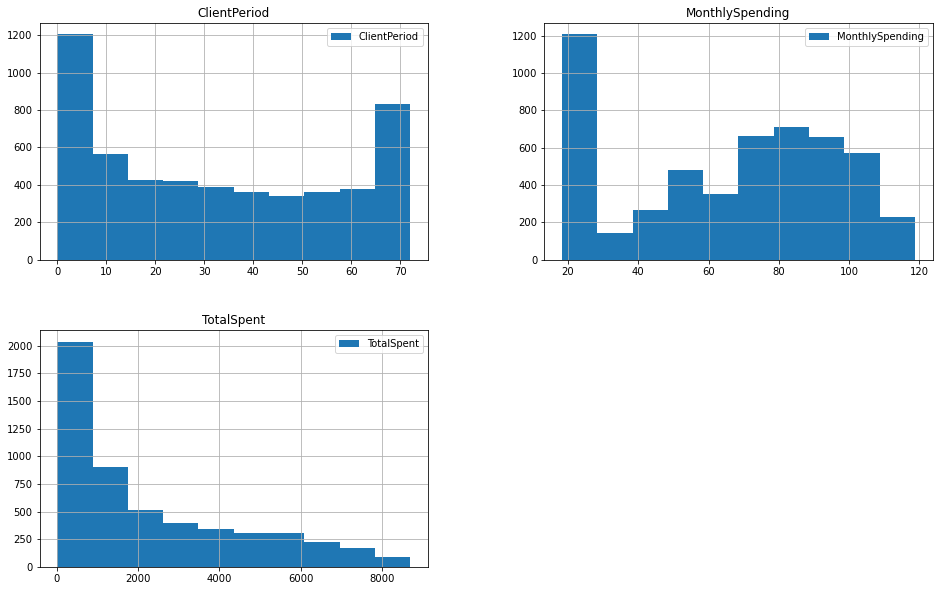

In [13]:
#Гистограммы
data.hist(column = num_cols, figsize = (16,10), legend = True)
plt.show()

In [14]:
cat_cols

['Sex',
 'IsSeniorCitizen',
 'HasPartner',
 'HasChild',
 'HasPhoneService',
 'HasMultiplePhoneNumbers',
 'HasInternetService',
 'HasOnlineSecurityService',
 'HasOnlineBackup',
 'HasDeviceProtection',
 'HasTechSupportAccess',
 'HasOnlineTV',
 'HasMovieSubscription',
 'HasContractPhone',
 'IsBillingPaperless',
 'PaymentMethod']

In [15]:
data['HasMultiplePhoneNumbers'].value_counts().to_frame().values

array([[2511],
       [2250],
       [ 521]], dtype=int64)

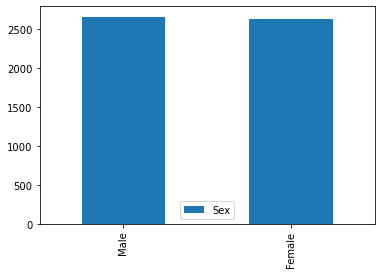

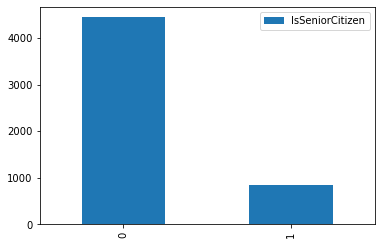

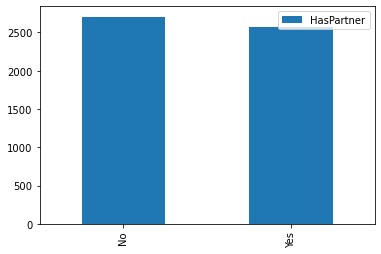

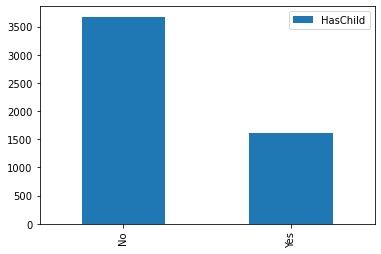

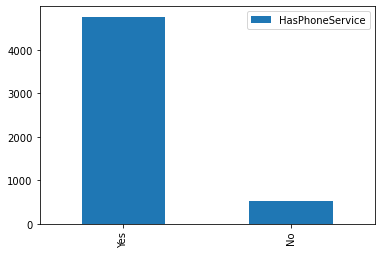

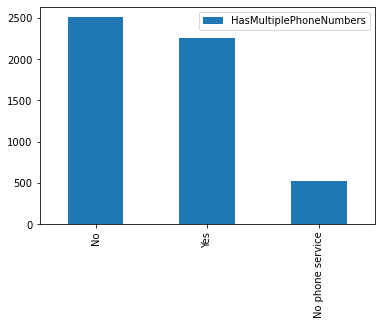

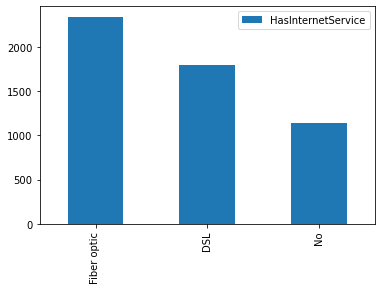

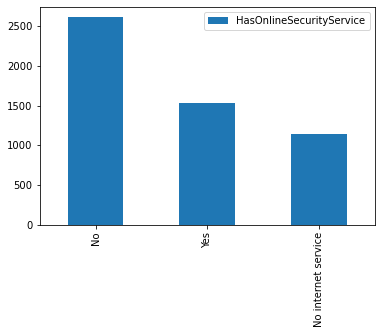

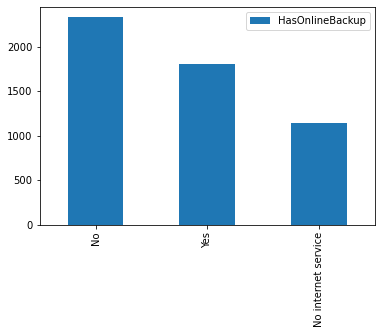

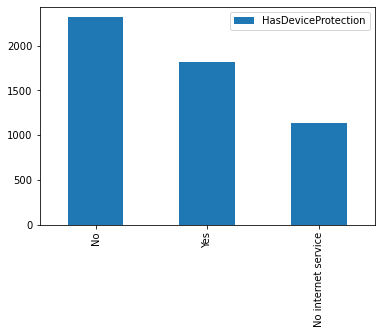

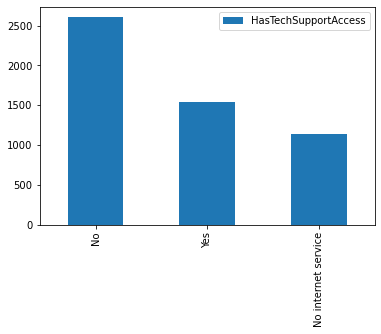

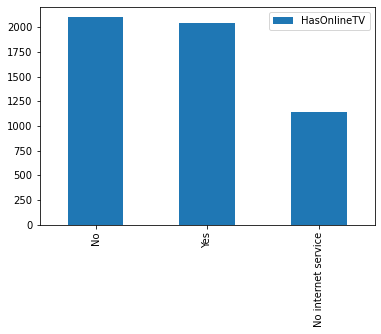

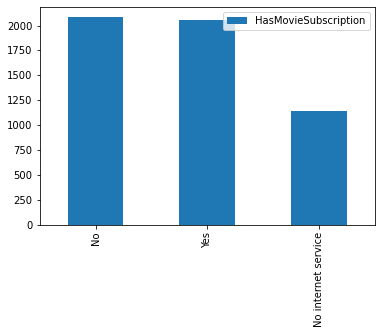

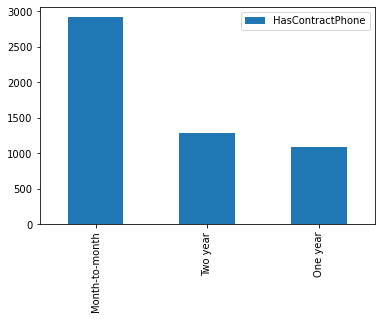

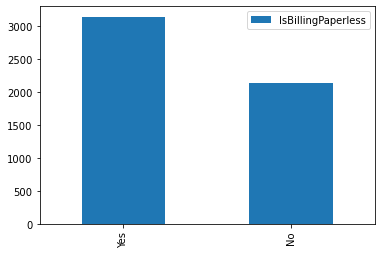

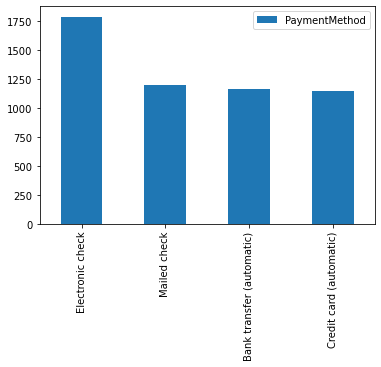

In [16]:
#Для категориальных
for i, col in enumerate(cat_cols): 
    data[col].value_counts().to_frame().plot.bar()
plt.show()

Ниже видно, что классы не сбалансированы (большая часть с label = 0), но некритично

<AxesSubplot:>

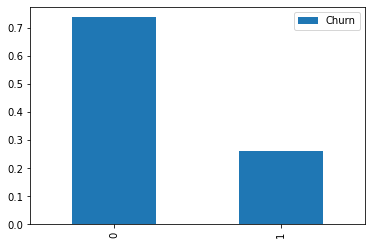

In [17]:
(data[target_col].value_counts()/len(data)).to_frame().plot.bar()

In [18]:
data['Churn'] = data['Churn'].astype(float)

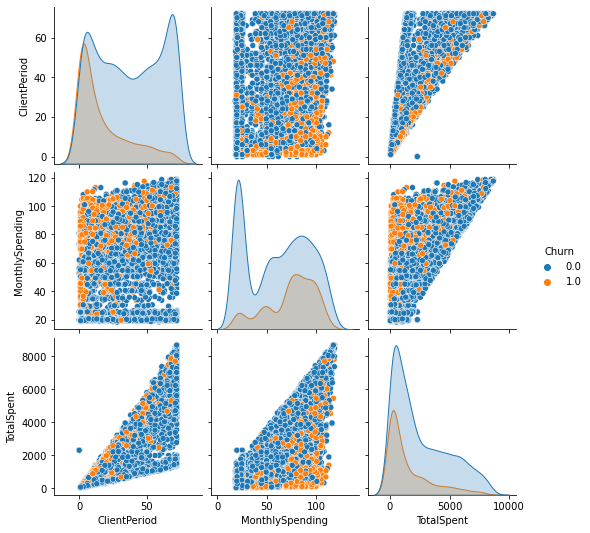

In [19]:
import seaborn as sns
num_cols.append('Churn')
sns.pairplot(data[num_cols], hue = 'Churn')
plt.show()
num_cols = num_cols[:-1]

(Дополнительно) Если вы нашли какие-то ошибки в данных или выбросы, то можете их убрать. Тут можно поэксперементировать с обработкой данных как угодно, но не за баллы.

In [20]:
target = data['Churn']

In [21]:
#Взаимная информация, можно пропустить при чтении
from sklearn.metrics import mutual_info_score
mutual_info_score(target, data['TotalSpent']/data['MonthlySpending'])

C:\Users\alexa\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\cluster\_supervised.py:58: UserWarning: Clustering metrics expects discrete values but received binary values for label, and continuous values for target
  warnings.warn(msg, UserWarning)


0.5175836019122749

In [22]:
data.drop('Churn', axis = 1, inplace = True)

In [23]:
data

,ClientPeriod,MonthlySpending,TotalSpent,Sex,IsSeniorCitizen,HasPartner,HasChild,HasPhoneService,HasMultiplePhoneNumbers,HasInternetService,HasOnlineSecurityService,HasOnlineBackup,HasDeviceProtection,HasTechSupportAccess,HasOnlineTV,HasMovieSubscription,HasContractPhone,IsBillingPaperless,PaymentMethod
0,55,19.50,1026.35,Male,0,Yes,Yes,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,No,Mailed check
1,72,25.85,1872.20,Male,0,Yes,No,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic)
2,1,75.90,75.90,Male,0,No,No,Yes,No,Fiber optic,No,No,No,Yes,No,No,Month-to-month,Yes,Electronic check
3,32,79.30,2570.00,Female,1,Yes,No,Yes,Yes,Fiber optic,No,No,Yes,No,No,No,Month-to-month,No,Mailed check
4,60,115.25,6758.45,Female,0,Yes,Yes,Yes,Yes,Fiber optic,Yes,Yes,Yes,Yes,Yes,Yes,Two year,No,Credit card (automatic)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5277,3,30.40,82.15,Male,0,No,No,No,No phone service,DSL,No,No,No,Yes,No,No,Month-to-month,No,Electronic check
5278,50,44.45,2188.45,Male,0,Yes,No,No,No phone service,DSL,Yes,No,No,Yes,Yes,No,One year,Yes,Bank transfer (automatic)
5279,1,55.05,55.05,Male,0,No,No,Yes,No,DSL,No,No,Yes,Yes,No,No,Month-to-month,No,Mailed check
5280,29,76.00,2215.25,Female,0,No,No,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Credit card (automatic)


## Применение линейных моделей (3 балла)

1) Обработайте данные для того, чтобы к ним можно было применить LogisticRegression. Т.е. отнормируйте числовые признаки, а категориальные закодируйте с помощью one-hot-encoding'а. 

2) С помощью кроссвалидации или разделения на train/valid выборку протестируйте разные значения гиперпараметра C и выберите лучший (можно тестировать С=100, 10, 1, 0.1, 0.01, 0.001) по метрике ROC-AUC. 

Если вы разделяете на train/valid, то используйте LogisticRegressionCV. Он сам при вызове .fit() подберет параметр С. (не забудьте передать scroing='roc_auc', чтобы при кроссвалидации сравнивались значения этой метрики, и refit=True, чтобы при потом модель обучилась на всем датасете с лучшим параметром C). 


(более сложный вариант) Если вы будете использовать кроссвалидацию, то преобразования данных и LogisticRegression нужно соединить в один Pipeline с помощью make_pipeline, как это делалось во втором семинаре. Потом pipeline надо передать в GridSearchCV. Для one-hot-encoding'a можно испльзовать комбинацию LabelEncoder + OneHotEncoder (сначала превращаем строчки в числа, а потом числа првращаем в one-hot вектора.)

In [24]:
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, RobustScaler, LabelEncoder, OneHotEncoder
from sklearn.pipeline import make_pipeline
X_train, X_test, y_train, y_test = train_test_split(data, target, 
                                                    train_size=0.8,
                                                    random_state=42)

In [25]:
X = pd.DataFrame.copy(data)

In [26]:
#Нормировка
scaler = StandardScaler()
scaler.fit_transform(X_train[num_cols])

array([[-0.05948827,  0.29437145, -0.08514082],
       [ 1.07907552,  1.17254755,  1.64942581],
       [ 1.11973852,  1.13775189,  1.64196404],
       ...,
       [ 0.71310859, -1.46198074, -0.53610526],
       [-0.99473711,  0.65724044, -0.71554015],
       [ 1.44504246, -0.33857811,  0.61054357]])

In [27]:
X_train[num_cols] = scaler.fit_transform(X_train[num_cols])
X_test[num_cols] = scaler.transform(X_test[num_cols])
X[num_cols] = scaler.fit_transform(X[num_cols])

C:\Users\alexa\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\alexa\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\indexing.py:1738: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)
C:\Users\alexa\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value

In [28]:
X_train

,ClientPeriod,MonthlySpending,TotalSpent,Sex,IsSeniorCitizen,HasPartner,HasChild,HasPhoneService,HasMultiplePhoneNumbers,HasInternetService,HasOnlineSecurityService,HasOnlineBackup,HasDeviceProtection,HasTechSupportAccess,HasOnlineTV,HasMovieSubscription,HasContractPhone,IsBillingPaperless,PaymentMethod
4556,-0.059488,0.294371,-0.085141,Female,1,No,No,Yes,No,Fiber optic,Yes,No,No,No,No,No,Month-to-month,Yes,Credit card (automatic)
1468,1.079076,1.172548,1.649426,Female,0,Yes,No,Yes,No,Fiber optic,No,Yes,No,Yes,Yes,Yes,Two year,Yes,Mailed check
3142,1.119739,1.137752,1.641964,Male,1,Yes,No,Yes,Yes,Fiber optic,No,No,No,Yes,Yes,Yes,Month-to-month,Yes,Electronic check
2093,-1.076063,0.304313,-0.830592,Female,0,No,No,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check
1505,1.607694,-1.322798,-0.188835,Male,0,Yes,Yes,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3092,-0.750759,0.894182,-0.434524,Female,0,Yes,Yes,Yes,Yes,Fiber optic,No,No,No,Yes,Yes,No,Month-to-month,Yes,Electronic check
3772,-0.547444,0.282773,-0.372849,Female,0,Yes,No,Yes,No,Fiber optic,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check
5191,0.713109,-1.461981,-0.536105,Female,0,Yes,Yes,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic)
5226,-0.994737,0.657240,-0.715540,Male,0,No,No,Yes,Yes,Fiber optic,No,No,No,No,No,Yes,Month-to-month,No,Bank transfer (automatic)


In [29]:
#One hot encoding
X_train = pd.concat([X_train , pd.get_dummies(X_train[cat_cols])],axis=1)
X_test = pd.concat([X_test , pd.get_dummies(X_test[cat_cols])],axis=1)
X = pd.concat([X , pd.get_dummies(X[cat_cols])],axis=1)

In [30]:
X_train.drop(cat_cols, axis = 1, inplace = True)
X_test.drop(cat_cols, axis = 1, inplace = True)
X.drop(cat_cols, axis = 1, inplace = True)


In [31]:
#Обучение модели
model = LogisticRegressionCV(Cs = [100, 10,   0.1, 0.01, 0.001],scoring = 'roc_auc', refit=True)
model.fit(X_train, y_train)

C:\Users\alexa\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegressionCV(Cs=[100, 10, 0.1, 0.01, 0.001], scoring='roc_auc')

In [32]:
X_t = pd.DataFrame.copy(X_test)

In [33]:
y_predictions = model.predict(X_test)
y_predictions_proba = model.predict_proba(X_test)


In [34]:
model.score(X_test, y_test)

0.8268394270462962

In [35]:
model.C_

array([10.])

Выпишите какое лучшее качество и с какими параметрами вам удалось получить

Лучшее качество: 0.8268394270462962
Параметр С = 10

In [36]:
y_predictions_regression = np.copy(y_predictions)

## Применение градиентного бустинга (2 балла)

Если вы хотите получить баллы за точный ответ, то стоит попробовать градиентный бустинг. Часто градиентный бустинг с дефолтными параметрами даст вам 80% результата за 0% усилий.

Мы будем использовать catboost, поэтому нам не надо кодировать категориальные признаки. catboost сделает это сам (в .fit() надо передать cat_features=cat_cols). А численные признаки нормировать для моделей, основанных на деревьях не нужно.

1) Разделите выборку на train/valid. Протестируйте catboost cо стандартными параметрами.

2) Протестируйте разные занчения параметроа количества деревьев и learning_rate'а и выберите лучшую по метрике ROC-AUC комбинацию. 

(Дополнительно) Есть некоторые сложности с тем, чтобы использовать CatBoostClassifier вместе с GridSearchCV, поэтому мы не просим использовать кроссвалидацию. Но можете попробовать)

In [703]:
#Ниже добавляются фичи с помощью стекинга, после чего на новый массив применяется catboost,
#до импорта последнего можно пропустить

In [37]:
X_test = pd.read_csv('test.csv')

In [38]:
X_test = X_test.replace('?', np.nan)
X_test = X_test.replace(' ', np.nan)

In [39]:
X_test.fillna(data['TotalSpent'].mean)

,ClientPeriod,MonthlySpending,TotalSpent,Sex,IsSeniorCitizen,HasPartner,HasChild,HasPhoneService,HasMultiplePhoneNumbers,HasInternetService,HasOnlineSecurityService,HasOnlineBackup,HasDeviceProtection,HasTechSupportAccess,HasOnlineTV,HasMovieSubscription,HasContractPhone,IsBillingPaperless,PaymentMethod
0,42,56.10,2386.85,Male,0,Yes,No,Yes,Yes,DSL,Yes,No,No,No,No,No,One year,No,Credit card (automatic)
1,29,98.50,3004.15,Male,1,Yes,No,Yes,Yes,Fiber optic,No,No,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check
2,9,76.25,684.85,Male,0,No,No,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check
3,67,74.00,4868.4,Female,0,Yes,Yes,Yes,Yes,DSL,Yes,Yes,No,Yes,Yes,No,Two year,No,Credit card (automatic)
4,71,20.10,1389.6,Female,0,Yes,Yes,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Bank transfer (automatic)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1756,71,105.15,7555,Female,0,Yes,No,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,Two year,Yes,Bank transfer (automatic)
1757,13,20.85,272.35,Female,0,Yes,Yes,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check
1758,2,91.45,171.45,Male,0,Yes,No,Yes,Yes,Fiber optic,No,No,Yes,No,Yes,No,Month-to-month,Yes,Electronic check
1759,19,89.10,1620.8,Female,0,Yes,No,Yes,Yes,Fiber optic,No,Yes,No,No,No,Yes,Month-to-month,Yes,Electronic check


In [40]:
X_test['TotalSpent'].astype(float)

0       2386.85
1       3004.15
2        684.85
3       4868.40
4       1389.60
         ...   
1756    7555.00
1757     272.35
1758     171.45
1759    1620.80
1760    4566.50
Name: TotalSpent, Length: 1761, dtype: float64

In [41]:
X_test_ = pd.DataFrame.copy(X_test)

In [42]:
for i in ([*num_cols, *cat_cols]):
    NaN = sum(X_test_[i].isna())
    print(NaN , f'NaNs in {i}:')

0 NaNs in ClientPeriod:
0 NaNs in MonthlySpending:
2 NaNs in TotalSpent:
0 NaNs in Sex:
0 NaNs in IsSeniorCitizen:
0 NaNs in HasPartner:
0 NaNs in HasChild:
0 NaNs in HasPhoneService:
0 NaNs in HasMultiplePhoneNumbers:
0 NaNs in HasInternetService:
0 NaNs in HasOnlineSecurityService:
0 NaNs in HasOnlineBackup:
0 NaNs in HasDeviceProtection:
0 NaNs in HasTechSupportAccess:
0 NaNs in HasOnlineTV:
0 NaNs in HasMovieSubscription:
0 NaNs in HasContractPhone:
0 NaNs in IsBillingPaperless:
0 NaNs in PaymentMethod:


In [43]:
X_test_['TotalSpent'].fillna(data['TotalSpent'].mean(), inplace = True)

In [44]:
X_test_[num_cols] = scaler.transform(X_test_[num_cols])
X_test_ = pd.concat([X_test_ , pd.get_dummies(X_test_[cat_cols])],axis=1)
X_test_.drop(cat_cols, axis = 1, inplace = True)
y_predictions_proba = model.predict_proba(X_test_)

In [45]:
X_test['Regression'] = y_predictions_proba[:,1]

In [46]:
data['Regression'] = model.predict_proba(X)[:,1]





In [47]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

In [48]:
from sklearn.model_selection import KFold
from sklearn.metrics import roc_auc_score
from tqdm.notebook import tqdm
from sklearn.model_selection import cross_val_predict

In [49]:
def compute_meta_feature(model, X_train, X_test, y_train, cv):
    try:
        train_answers = cross_val_predict(model, X_train, y_train, cv=cv, method='predict_proba')[:, 1]
        model.fit(X_train, y_train)
        return train_answers, model.predict_proba(X_test)[:, 1]
    
    except Exception:
        train_answers = cross_val_predict(model, X_train, y_train, cv=cv, method='predict')[:, 1]
        model.fit(X_train, y_train)
        return train_answers, model.predict(X_test)[:, 1]

In [50]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

In [51]:
models = []
models.append(KNeighborsClassifier(n_jobs=-1, n_neighbors=30))
models.append(LogisticRegression())
models.append(RandomForestClassifier(max_depth=3, n_estimators=50, n_jobs=-1))
models.append(RandomForestClassifier(max_depth=7, n_estimators=50, n_jobs=-1))
models.append(DecisionTreeClassifier(max_depth=8))
meta_features_train = np.zeros((X.shape[0], 0))
meta_features_test = np.zeros((X_test_.shape[0], 0))

In [52]:
X

,ClientPeriod,MonthlySpending,TotalSpent,Sex_Female,Sex_Male,HasPartner_No,HasPartner_Yes,HasChild_No,HasChild_Yes,HasPhoneService_No,...,HasMovieSubscription_Yes,HasContractPhone_Month-to-month,HasContractPhone_One year,HasContractPhone_Two year,IsBillingPaperless_No,IsBillingPaperless_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0.920767,-1.505447,-0.558057,0,1,0,1,0,1,0,...,0,0,1,0,1,0,0,0,0,1
1,1.613288,-1.294998,-0.184921,0,1,0,1,1,0,0,...,0,0,0,1,1,0,0,1,0,0
2,-1.279005,0.363737,-0.977337,0,1,1,0,1,0,0,...,0,1,0,0,0,1,0,0,1,0
3,-0.016173,0.476418,0.122905,1,0,0,1,1,0,0,...,0,1,0,0,1,0,0,0,0,1
4,1.124450,1.667856,1.970589,1,0,0,1,0,1,0,...,1,0,0,1,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5277,-1.197532,-1.144204,-0.974579,0,1,1,0,1,0,1,...,0,1,0,0,1,0,0,0,1,0
5278,0.717084,-0.678565,-0.045411,0,1,0,1,1,0,1,...,0,0,1,0,0,1,1,0,0,0
5279,-1.279005,-0.327265,-0.986534,0,1,1,0,1,0,0,...,0,1,0,0,1,0,0,0,0,1
5280,-0.138382,0.367051,-0.033588,1,0,1,0,1,0,0,...,0,1,0,0,0,1,0,1,0,0


In [53]:
for model in tqdm(models):
    train, test = compute_meta_feature(model, X, X_test_,target, 5)
    meta_features_train = np.append(meta_features_train, train.reshape((train.size, 1)), axis=1)
    meta_features_test = np.append(meta_features_test, test.reshape((test.size, 1)), axis=1)

  0%|          | 0/5 [00:00<?, ?it/s]

C:\Users\alexa\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [54]:
stacking_model = LogisticRegression()
stacking_model.fit(meta_features_train, target)

y_train_predicted = stacking_model.predict_proba(meta_features_train)[:, 1]
y_test_predicted = stacking_model.predict_proba(meta_features_test)[:, 1]




In [55]:
np.shape(meta_features_train)

(5282, 5)

In [56]:
data = pd.concat([data , pd.DataFrame(meta_features_train) ],axis=1)

In [57]:
X_test = pd.concat([X_test , pd.DataFrame(meta_features_test) ],axis=1)

In [58]:
X_test['TotalSpent'] = X_test['TotalSpent'].astype(float)

In [59]:
data

,ClientPeriod,MonthlySpending,TotalSpent,Sex,IsSeniorCitizen,HasPartner,HasChild,HasPhoneService,HasMultiplePhoneNumbers,HasInternetService,...,HasMovieSubscription,HasContractPhone,IsBillingPaperless,PaymentMethod,Regression,0,1,2,3,4
0,55,19.50,1026.35,Male,0,Yes,Yes,Yes,No,No,...,No internet service,One year,No,Mailed check,0.005838,0.000000,0.007761,0.054477,0.022938,0.000000
1,72,25.85,1872.20,Male,0,Yes,No,Yes,Yes,No,...,No internet service,Two year,No,Credit card (automatic),0.001778,0.000000,0.002516,0.029974,0.005683,0.000000
2,1,75.90,75.90,Male,0,No,No,Yes,No,Fiber optic,...,No,Month-to-month,Yes,Electronic check,0.604973,0.666667,0.616470,0.497424,0.608746,0.000000
3,32,79.30,2570.00,Female,1,Yes,No,Yes,Yes,Fiber optic,...,No,Month-to-month,No,Mailed check,0.378914,0.400000,0.372501,0.358016,0.326998,0.338129
4,60,115.25,6758.45,Female,0,Yes,Yes,Yes,Yes,Fiber optic,...,Yes,Two year,No,Credit card (automatic),0.030500,0.000000,0.027408,0.089863,0.024588,0.051724
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5277,3,30.40,82.15,Male,0,No,No,No,No phone service,DSL,...,No,Month-to-month,No,Electronic check,0.430586,0.466667,0.454244,0.404351,0.414080,0.000000
5278,50,44.45,2188.45,Male,0,Yes,No,No,No phone service,DSL,...,No,One year,Yes,Bank transfer (automatic),0.041245,0.033333,0.049783,0.127698,0.075136,0.000000
5279,1,55.05,55.05,Male,0,No,No,Yes,No,DSL,...,No,Month-to-month,No,Mailed check,0.261461,0.433333,0.257288,0.380389,0.463308,0.494505
5280,29,76.00,2215.25,Female,0,No,No,Yes,Yes,Fiber optic,...,No,Month-to-month,Yes,Credit card (automatic),0.436007,0.533333,0.475285,0.394238,0.418191,0.391892


In [93]:
#Бустинг
import catboost
X_train_origin, X_test_origin, _, _ = train_test_split(data, target, 
                                                       train_size=0.8, 
                                                       random_state=42)

In [302]:
boosting_model = catboost.CatBoostClassifier(
                                             cat_features=cat_cols,
                                             verbose=100,
                                             depth = 4,
                                             l2_leaf_reg =10,
                                             iterations = 300,
                                             learning_rate = 0.03
                                            )

boosting_model.fit(X_train_origin, y_train)

y_train_predicted = boosting_model.predict_proba(X_train_origin)[:, 1]
y_test_predicted = boosting_model.predict_proba(X_test_origin)[:, 1]

0:	learn: 0.6738990	total: 11.5ms	remaining: 3.45s
100:	learn: 0.3994937	total: 965ms	remaining: 1.9s
200:	learn: 0.3913444	total: 1.89s	remaining: 930ms
299:	learn: 0.3856342	total: 2.74s	remaining: 0us


In [300]:
train_auc = roc_auc_score(y_train, y_train_predicted)
test_auc = roc_auc_score(y_test, y_test_predicted)

In [301]:
print(train_auc, test_auc)

0.8654716150850501 0.8301641100470074


Выпишите какое лучшее качество и с какими параметрами вам удалось получить

Лучшее качество:0.8293190864509933
Число деревьев: 1310

# Предсказания

In [259]:
best_model = boosting_model

In [260]:
y_pred_test = best_model.predict_proba(X_test)[:, 1]

In [261]:
answer = pd.DataFrame({'id': np.arange(1761),'Churn': y_pred_test})


In [262]:
answer.to_csv('my_submission.csv',index=False)

# Kaggle (5 баллов)

Как выставить баллы:

1) 1 >= roc auc > 0.84 это 5 баллов

2) 0.84 >= roc auc > 0.7 это 3 балла

3) 0.7 >= roc auc > 0.6 это 1 балл

4) 0.6 >= roc auc это 0 баллов


Для выполнения задания необходимо выполнить следующие шаги.
* Зарегистрироваться на платформе [kaggle.com](kaggle.com). Процесс выставления оценок будет проходить при подведении итогового рейтинга. Пожалуйста, укажите во вкладке Team -> Team name свои имя и фамилию в формате Имя_Фамилия (важно, чтобы имя и фамилия совпадали с данными на Stepik).
* Обучить модель, получить файл с ответами в формате .csv и сдать его в конкурс. Пробуйте и экспериментируйте. Обратите внимание, что вы можете выполнять до 20 попыток сдачи на kaggle в день.
* После окончания соревнования отправить в итоговый ноутбук с решением на степик. 
* После дедлайна проверьте посылки других участников по критериям. Для этого надо зайти на степик, скачать их ноутбук и проверить скор в соревновании.

In [123]:
#Скор на Каггл 0.85511, Александр_Савич 9 место на момент сдачи  